## DATA PROCESSING

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Initial Data

In [51]:
df = pd.read_csv('api_data.csv')

In [52]:
print(df.shape)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()


(17025, 3)
(16790, 3)


,Category,Service Name,Description
0,Advertising,SEO Automations,Optimize your website effortlessly with SEOOpt...
1,Advertising,Keyword Suggestions,Get keyword suggestions from a keyword seed.
2,Advertising,✨ Website Categorization API - Now with AI!,This API allows you to obtain a website catego...
3,Advertising,Keyword Traffic,Get keyword traffic analytics for Google Ads a...
4,Advertising,Keyword Suggestion API,A Keyword Suggestion API allows developers to ...


In [53]:
len(df['Category'].unique())

49

In [54]:
df['Category'].value_counts()

,count
Category,
Other,996
Tools,991
Artificial Intelligence/Machine Learning,989
Business,987
Advertising,959
"News, Media",936
Data,897
Finance,856
eCommerce,791


## Recategorize data

In [55]:
api_services = {
    "Technology Infrastructure & Tools": [
        "Artificial Intelligence/Machine Learning", "Cryptography", "Cybersecurity",
        "Database", "Data", "Monitoring", "Text Analysis",
        "Storage", "Tools", "Visual Recognition", "Translation","Search"
    ],

    "Business & Financial Services": [
        "Business", "Business Software", "Finance", "Financial",
        "Payments", "Reward", "Jobs"
    ],

    "Commerce & Logistics": [
        "Advertising", "Commerce", "eCommerce",
        "Logistics", "Transportation", "Travel"
    ],

    "Communication & Media ": [
        "Communication", "Email", "SMS", "Social",
        "News", "Media", "Events","News, Media"
    ],

    "Entertainment & Content Delivery": [
        "Entertainment", "Gaming", "Movies",
        "Music", "Video, Images","Sports"
    ],

    "Health, Information and Environment Services": [
        "Health and Fitness", "Medical", "Science",
        "Education","Devices",  "Food", "Location",
        "Mapping","Weather","Energy",
    ],
}

In [56]:
def categorize_service(x):
    for category, services in api_services.items():
        if x in services:
            return category
    return "Other"

In [57]:
df['Class'] = df['Category'].apply(categorize_service)

In [58]:
len(df['Class'].unique())

7

In [59]:
df['Category'] = df['Class']
df.drop(columns=['Class'], inplace=True)

In [60]:
df.to_csv('api_data_classified_7_new.csv', index=False)

## Data Statistics

In [61]:
df.value_counts('Category')

,count
Category,
Technology Infrastructure & Tools,4619
Business & Financial Services,2834
Commerce & Logistics,2542
Communication & Media,2426
"Health, Information and Environment Services",1781
Entertainment & Content Delivery,1592
Other,996


<Axes: xlabel='Category'>

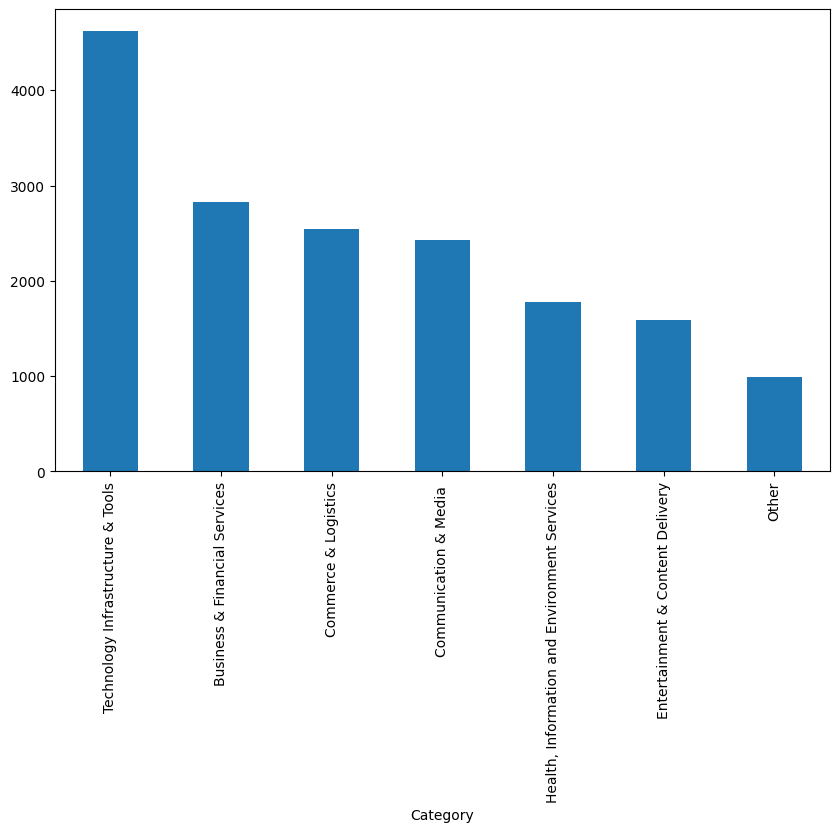

In [62]:
df['Category'].value_counts().plot(kind='bar', figsize=(10, 6))

<Axes: ylabel='count'>

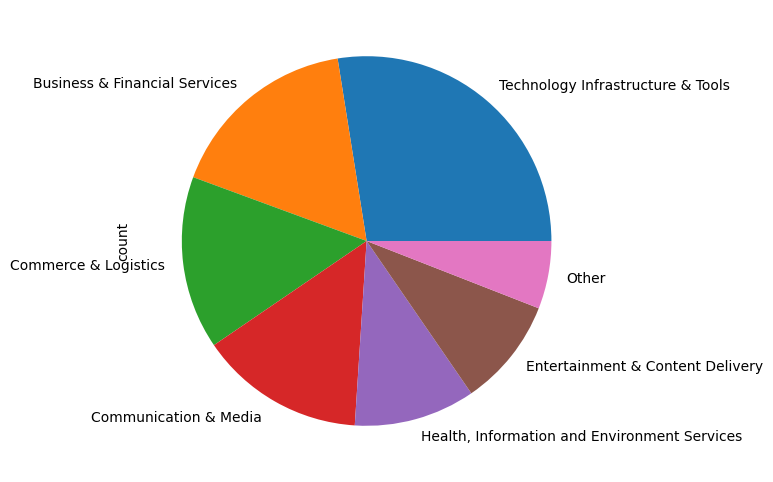

In [63]:
df['Category'].value_counts().plot(kind='pie', figsize=(10, 6))

## Language Counting

In [64]:
import langid

In [65]:
# Detect language using langid
df['detected_language'] = df['Description'].apply(lambda x: langid.classify(x)[0])

# Get value counts
language_counts = df['detected_language'].value_counts()

print(language_counts)


detected_language
en    14626
vi      795
es      207
fr      174
de      146
      ...  
ps        1
fa        1
uk        1
ur        1
bg        1
Name: count, Length: 67, dtype: int64


In [66]:
#represent language_count below 10 as other
other_languages = language_counts[language_counts < 20].index.tolist()
language_counts['Other'] = language_counts[language_counts < 20].sum()
language_counts = language_counts[language_counts >= 20]
language_counts


,count
detected_language,
en,14626
vi,795
es,207
fr,174
de,146
pt,99
it,96
nl,51
mt,48


<Axes: xlabel='detected_language'>

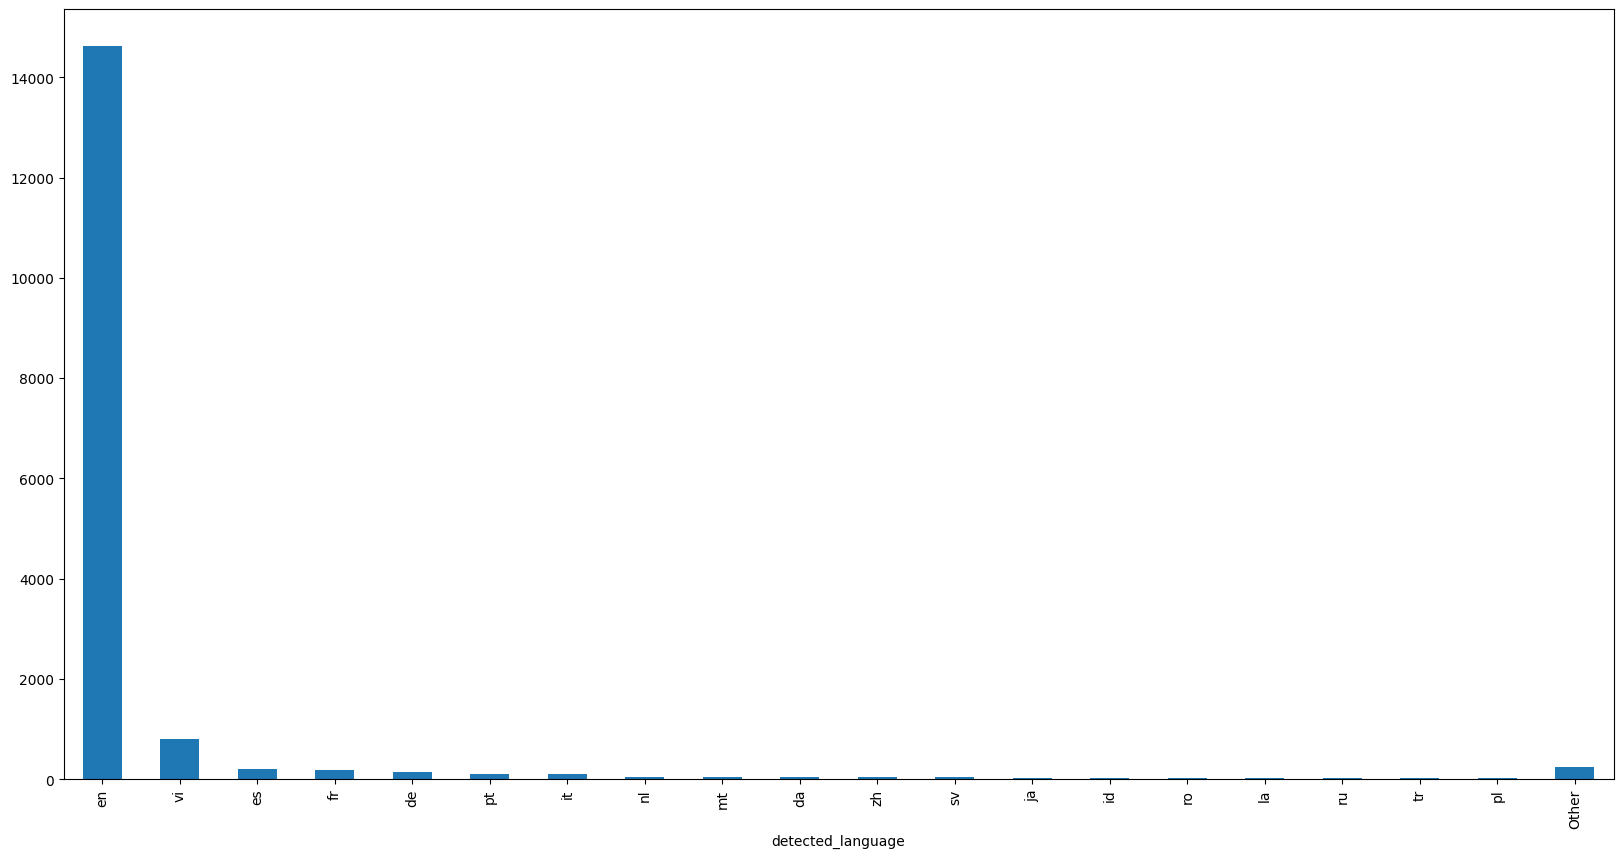

In [70]:
#pie chart
language_counts.plot(kind='bar', figsize=(20, 10))

The representation shows that the data contains very few data with languages other than english.